In [65]:
import warnings
import pandas as pd
import seaborn as sns

from pandas_gbq import read_gbq
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter("ignore")

In [3]:
%load_ext google.cloud.bigquery


In [4]:
%%bigquery --use_rest_api --project customer-transaction-analysis
SELECT * FROM `customer-transaction-analysis.customer_data.transactions`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000006,AC00393,92.15,2023-04-03 17:15:00+00:00,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:00+00:00
1,TX000413,AC00421,242.39,2023-11-20 16:29:00+00:00,Credit,San Antonio,D000451,26.105.49.129,M008,ATM,18,Student,271,1,1328.73,2024-11-04 08:06:00+00:00
2,TX000899,AC00083,1531.31,2023-10-23 18:00:00+00:00,Debit,San Diego,D000319,91.204.200.167,M078,Online,18,Student,62,4,859.86,2024-11-04 08:06:00+00:00
3,TX002004,AC00388,248.76,2023-05-24 16:12:00+00:00,Debit,Denver,D000334,80.75.92.66,M091,ATM,18,Student,56,1,546.46,2024-11-04 08:06:00+00:00
4,TX002102,AC00374,51.20,2023-03-13 18:45:00+00:00,Debit,Tucson,D000105,21.97.154.92,M066,Online,18,Student,83,1,730.60,2024-11-04 08:06:00+00:00


In [6]:
# confirm the total rows
%%bigquery --use_rest_api --project customer-transaction-analysis
SELECT 
  COUNT(*) AS total_rows,
  COUNTIF(TransactionID IS NULL) AS null_transaction_id,
  COUNTIF(TransactionAmount IS NULL) AS null_amount,
  
FROM customer-transaction-analysis.customer_data.transactions;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_transaction_id,null_amount
0,2512,0,0


In [53]:
# read into csv 
query = "SELECT * FROM customer-transaction-analysis.customer_data.transactions"
df = read_gbq(query, project_id="customer-transaction-analysis")

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████|


In [54]:
# display first five rows from the table
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000006,AC00393,92.15,2023-04-03 17:15:00+00:00,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:00+00:00
1,TX000413,AC00421,242.39,2023-11-20 16:29:00+00:00,Credit,San Antonio,D000451,26.105.49.129,M008,ATM,18,Student,271,1,1328.73,2024-11-04 08:06:00+00:00
2,TX000899,AC00083,1531.31,2023-10-23 18:00:00+00:00,Debit,San Diego,D000319,91.204.200.167,M078,Online,18,Student,62,4,859.86,2024-11-04 08:06:00+00:00
3,TX002004,AC00388,248.76,2023-05-24 16:12:00+00:00,Debit,Denver,D000334,80.75.92.66,M091,ATM,18,Student,56,1,546.46,2024-11-04 08:06:00+00:00
4,TX002102,AC00374,51.20,2023-03-13 18:45:00+00:00,Debit,Tucson,D000105,21.97.154.92,M066,Online,18,Student,83,1,730.60,2024-11-04 08:06:00+00:00


In [55]:
df.shape

(2512, 16)

In [56]:
# check for duplicates
df.duplicated().sum()

0

In [57]:
# Check data summary
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [58]:
# check data types
df.dtypes

TransactionID                           object
AccountID                               object
TransactionAmount                      float64
TransactionDate            datetime64[ns, UTC]
TransactionType                         object
Location                                object
DeviceID                                object
IP Address                              object
MerchantID                              object
Channel                                 object
CustomerAge                              Int64
CustomerOccupation                      object
TransactionDuration                      Int64
LoginAttempts                            Int64
AccountBalance                         float64
PreviousTransactionDate    datetime64[ns, UTC]
dtype: object

# Transaction analysis

### Amount

<AxesSubplot:xlabel='TransactionAmount'>

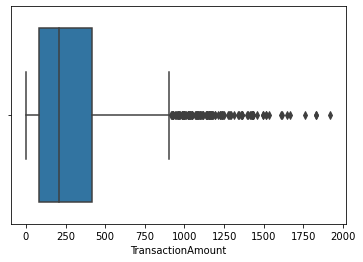

In [59]:
# Transaction amount distribution

sns.boxplot(x=df["TransactionAmount"])

In [63]:
#Remove outliers in transaction amount
df["TransactionAmount"].quantile([0.1, 0.9])
df = df[df["TransactionAmount"].between(low,high)]
df.shape

(2008, 16)

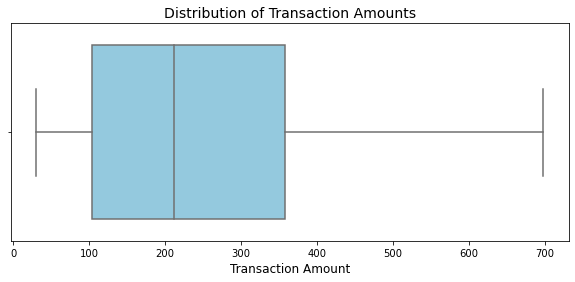

In [66]:
# Recheck distribution
# Create figure and plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["TransactionAmount"], color="skyblue")

# Add title and axis labels
plt.title("Distribution of Transaction Amounts", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)

# Show the plot
plt.show()


In [73]:
# show top 10 highest transactions
df["TransactionAmount"].sort_values().tail(10)


274     684.96
581     686.17
1975    688.36
282     689.29
779     689.54
2353    691.92
2434    692.55
577     694.20
2301    697.32
457     697.82
Name: TransactionAmount, dtype: float64

### Date


In [74]:
# confirm date data type
df["TransactionDate"].dtypes

datetime64[ns, UTC]

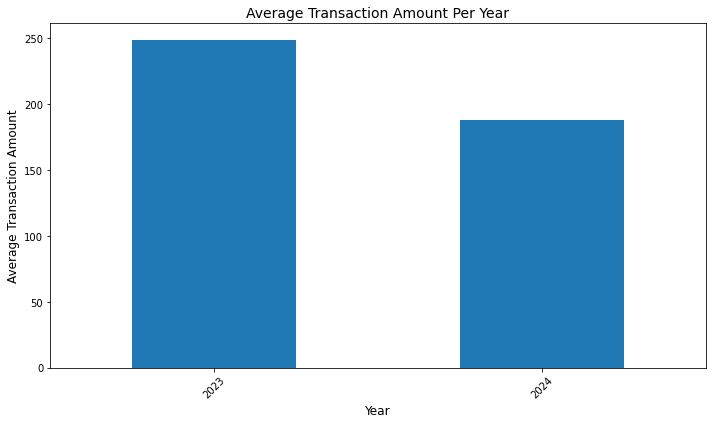

In [86]:
# check Average transaction per year

# Group by year and calculate average transaction amount
avg_per_year = df.groupby(df["TransactionDate"].dt.year)["TransactionAmount"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_per_year.plot(kind="bar")

# Add title and labels
plt.title("Average Transaction Amount Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Transaction Amount", fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [126]:
# Create a month column
df["TransactionMonth"] = df["TransactionDate"].dt.month

month_dict = {
    
    1:"Jan",
    2:"Feb",
    3:"March",
    4:"April",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sep",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}

df["TransactionMonth"] = df["TransactionMonth"].map(month_dict)

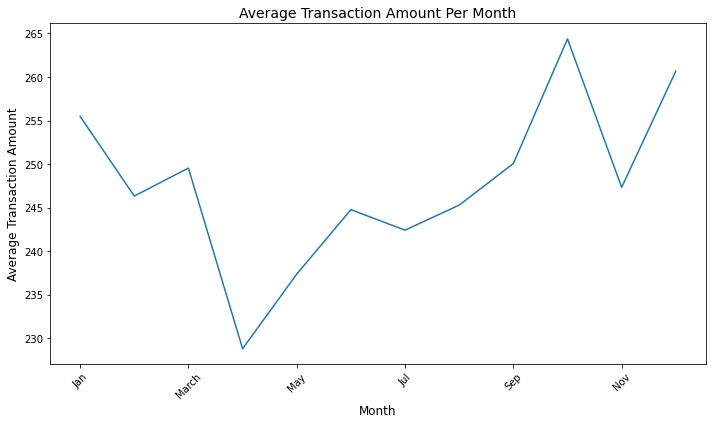

In [156]:
# check Average transaction per month
month_name_to_num = {v: k for k, v in month_dict.items()}
avg_per_month["MonthNumber"] = avg_per_month["TransactionMonth"].map(month_name_to_num)

# Group by year and calculate average transaction amount
plt.figure(figsize=(10, 6))
(avg_per_month
    .set_index("TransactionMonth")
    .sort_values("MonthNumber")["TransactionAmount"]
    .plot())

plt.title("Average Transaction Amount Per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Transaction Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [174]:
avg_per_day = df.groupby(df["TransactionDate"].dt.day_name())["TransactionAmount"].mean()

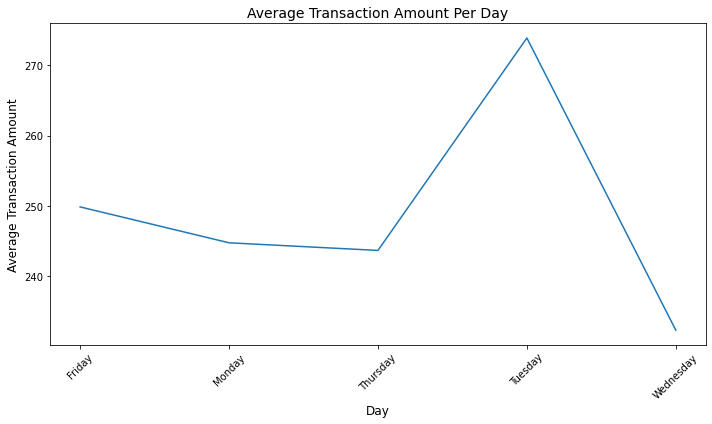

In [181]:
# check Average transaction per day

# Group by year and calculate average transaction amount
plt.figure(figsize=(10, 6))
plt.plot(avg_per_day)

plt.title("Average Transaction Amount Per Day", fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Average Transaction Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Customers


In [236]:
# Top 10 customers with the most Transaction amount

top_10 = df.groupby("AccountID")["TransactionAmount"].sum().sort_values().tail(10)

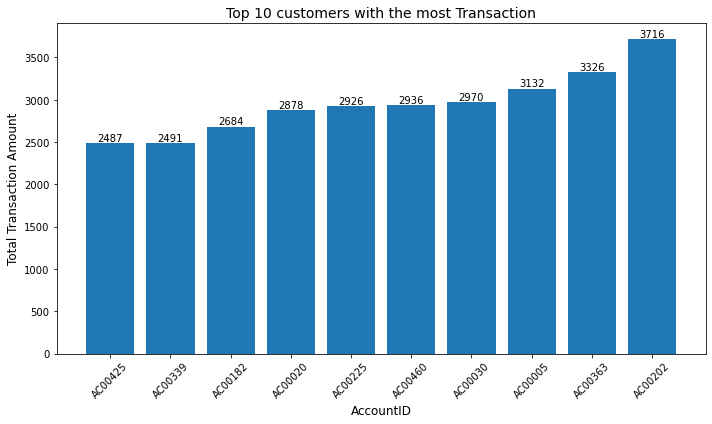

In [241]:
#Plot top 10 #customers
plt.figure(figsize=(10, 6))
plt.bar(top_10.index, height=top_10.values  )
for i,v in enumerate(top_20.values):
    plt.text(i,v, f"{round(v)}", ha="center", va="bottom")
plt.title("Top 10 customers with the most Transaction", fontsize=14)
plt.xlabel("AccountID", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

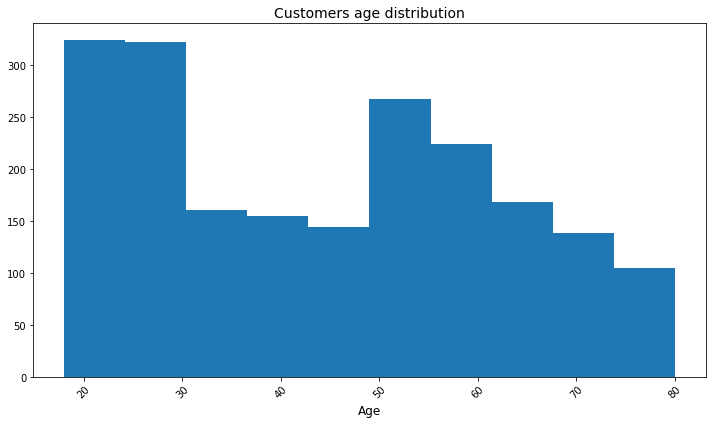

In [246]:
# pattern by customer age
plt.figure(figsize=(10, 6))
plt.hist(df["CustomerAge"])
plt.title("Customers age distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [247]:
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionMonth
0,TX000006,AC00393,92.15,2023-04-03 17:15:00+00:00,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:00+00:00,April
1,TX000413,AC00421,242.39,2023-11-20 16:29:00+00:00,Credit,San Antonio,D000451,26.105.49.129,M008,ATM,18,Student,271,1,1328.73,2024-11-04 08:06:00+00:00,Nov
3,TX002004,AC00388,248.76,2023-05-24 16:12:00+00:00,Debit,Denver,D000334,80.75.92.66,M091,ATM,18,Student,56,1,546.46,2024-11-04 08:06:00+00:00,May
4,TX002102,AC00374,51.20,2023-03-13 18:45:00+00:00,Debit,Tucson,D000105,21.97.154.92,M066,Online,18,Student,83,1,730.60,2024-11-04 08:06:00+00:00,March
5,TX002127,AC00242,84.91,2023-10-16 18:38:00+00:00,Debit,Raleigh,D000667,141.201.46.191,M034,Online,18,Student,68,1,1671.86,2024-11-04 08:06:00+00:00,Oct


# Exploratory Data Analysis

In [249]:
# Create RFM table
# first confirm data types of the date columns
df[["TransactionDate", "PreviousTransactionDate"]].dtypes

TransactionDate            datetime64[ns, UTC]
PreviousTransactionDate    datetime64[ns, UTC]
dtype: object

In [266]:
#Limit to only data in 2023
df = df[df["TransactionDate"].dt.year == 2023]

In [269]:
# Calculate the most recent date and add an extra day
today = df["TransactionDate"].max() + pd.Timedelta(days=1)
today

Timestamp('2023-12-30 18:29:00+0000', tz='UTC')

In [295]:
# Create the recency data frame
recency_df = df.groupby(df["AccountID"])["TransactionDate"].max().reset_index()
recency_df["recency"] = (today - recency_df["TransactionDate"]).dt.days
recency_df.drop(columns="TransactionDate", inplace=True)
recency_df.head()

,AccountID,recency
0,AC00001,46
1,AC00002,9
2,AC00003,88
3,AC00004,18
4,AC00005,26


In [296]:
# Create the Frequency data frame
frequency_df = df.groupby(df["AccountID"])["TransactionID"].count().reset_index()
frequency_df["Frequency"] = frequency_df["TransactionID"]
frequency_df.drop(columns=["TransactionID"], inplace=True)
frequency_df.head()

,AccountID,Frequency
0,AC00001,2
1,AC00002,6
2,AC00003,4
3,AC00004,7
4,AC00005,9


In [297]:
# Create the Frequency data frame
monetary_df = df.groupby('AccountID')['TransactionAmount'].sum().reset_index()
monetary_df.rename(columns={'TransactionAmount': 'Monetary'}, inplace=True)
monetary_df.head()

,AccountID,Monetary
0,AC00001,260.76
1,AC00002,2043.59
2,AC00003,1246.17
3,AC00004,2126.26
4,AC00005,3131.77


In [301]:
rfm = recency_df.merge(frequency_df, on="AccountID").merge(monetary_df, on="AccountID")
rfm.head()

,AccountID,recency,Frequency,Monetary
0,AC00001,46,2,260.76
1,AC00002,9,6,2043.59
2,AC00003,88,4,1246.17
3,AC00004,18,7,2126.26
4,AC00005,26,9,3131.77


# Exploratory Data Analysis on RFM table

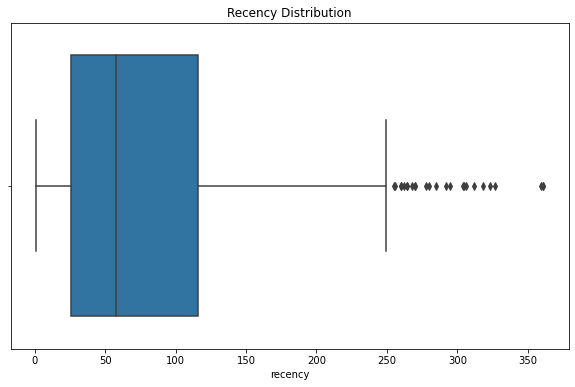

In [312]:
# Check Recency distribution using boxplot
plt.subplots(figsize=(10,6))
sns.boxplot(rfm["recency"])
plt.title("Recency Distribution")
plt.show()

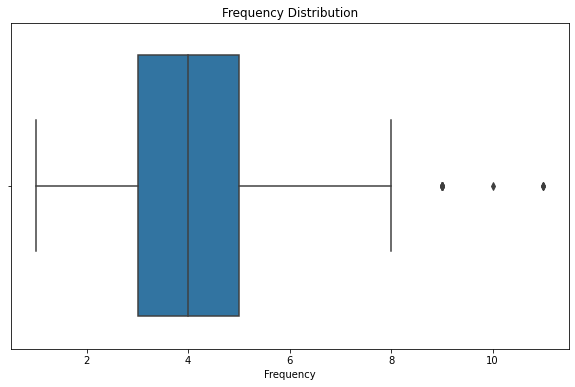

In [311]:
# Check Frequency distribution using boxplot
plt.subplots(figsize=(10,6))
sns.boxplot(rfm["Frequency"])
plt.title("Frequency Distribution")
plt.show()

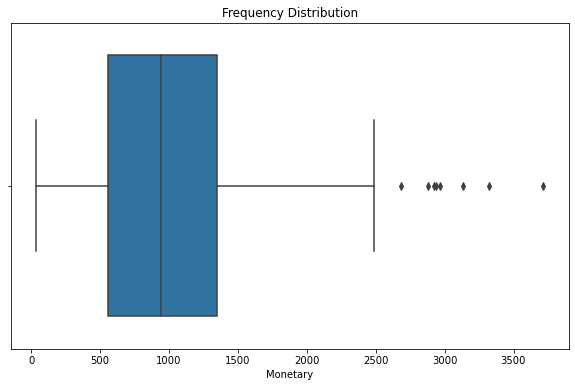

In [310]:
# Check Monetary distribution using boxplot
plt.subplots(figsize=(10,6))
sns.boxplot(rfm["Monetary"])
plt.title("Frequency Distribution")
plt.show()

In [313]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccountID  492 non-null    object 
 1   recency    492 non-null    int64  
 2   Frequency  492 non-null    int64  
 3   Monetary   492 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.2+ KB


In [314]:
rfm.describe()

,recency,Frequency,Monetary
count,492.000000,492.000000,492.000000
mean,82.678862,4.058943,1008.459126
std,77.737682,1.985328,590.258415
min,1.000000,1.000000,35.980000
25%,26.000000,3.000000,556.040000
50%,58.000000,4.000000,944.370000
75%,116.250000,5.000000,1348.395000
max,361.000000,11.000000,3716.460000


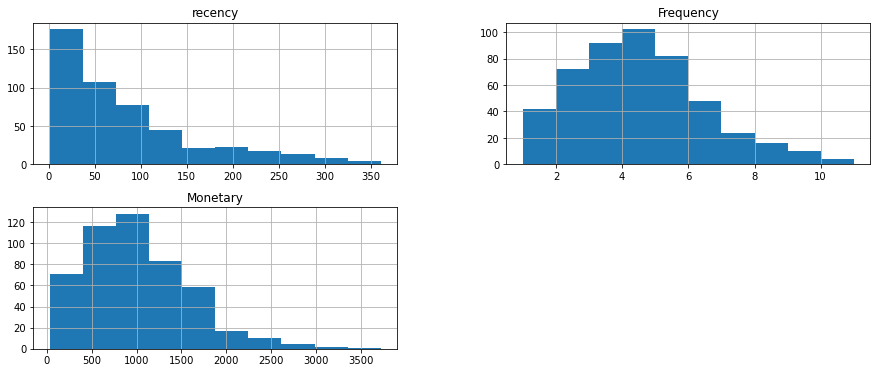

In [322]:
rfm.hist(figsize=(15, 6))
plt.show()

# KMeans Modelling